In [6]:
import pandas as pd
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('people with title final.csv')
df.head()

,Unnamed: 0,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity,identity,isAlive
0,0,Viserys II Targaryen,1,NaN,NaN,0,0,0,0,0,0,0,NaN,11,1,0.605351,king,0
1,1,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,0.896321,knight,1
2,2,Addison Hill,1,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0,0.267559,lord,1
3,3,Aemma Arryn,0,NaN,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0.183946,official,0
4,4,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0,0.043478,noble,1


In [3]:
to_drop = ['book1','book2','book3','book4','book5']
df_visual = df.drop(columns = to_drop)

In [4]:
df_visual.describe()

,Unnamed: 0,male,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,972.500000,0.619219,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.089584,0.745632
std,561.906131,0.485704,0.348965,0.498601,19564.340993,1.383910,0.262669,0.160568,0.435617
min,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000
25%,486.250000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.013378,0.000000
50%,972.500000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.033445,1.000000
75%,1458.750000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.086957,1.000000
max,1945.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000


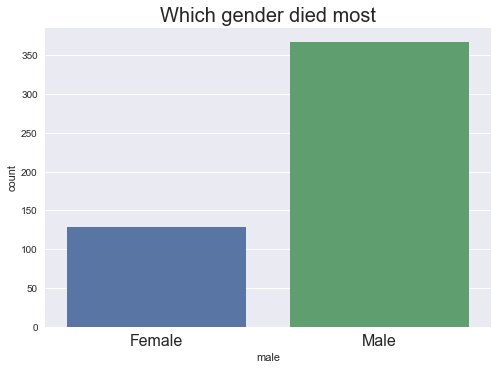

In [8]:
sns.countplot(df_visual[df_visual['isAlive']==0]['male'])
plt.title('Which gender died most',fontsize = 20)
plt.xticks(np.arange(2),('Female','Male'),fontsize = 16)
plt.show()

In [ ]:
df_visual['identity'].unique()

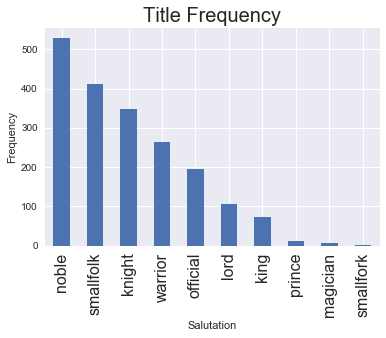

In [9]:
plt.figure(figsize = (6,4))
plt.xlabel('Salutation')
plt.xticks(fontsize = 16)
plt.ylabel('Frequency')
plt.title('Title Frequency',fontsize = 20)
df_visual.identity.value_counts().sort_values(ascending = False).plot.bar()

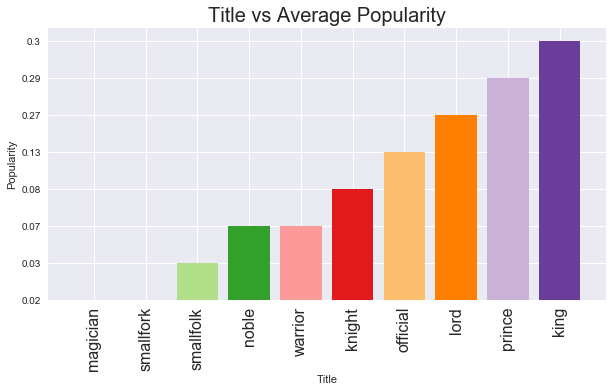

In [12]:
unique = df_visual.identity
p_rates = {}
Pop = sum(df_visual.popularity)
for sal in unique:
    if(type(sal)==str):
        p_rates[sal] = sum(df_visual.loc[df_visual['identity'] == sal,'popularity'])/(sum(df_visual.identity == sal))

plot_rates = []       
for key, value in zip(p_rates.keys(), p_rates.values()):
    plot_rates.append([key,round(value,2)])
pops = sorted(plot_rates, key = lambda x: x[1], reverse = False)
pops = np.array(pops)
pops = pops[len(pops)-20:len(pops),:]
plt.figure(figsize = (10,5))
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation = 90, fontsize = 16)
plt.title('Title vs Average Popularity', fontsize = 20)
plt.bar(pops[:,0],pops[:,1] , color = sns.color_palette('Paired', n_colors=15))
sns.despine()

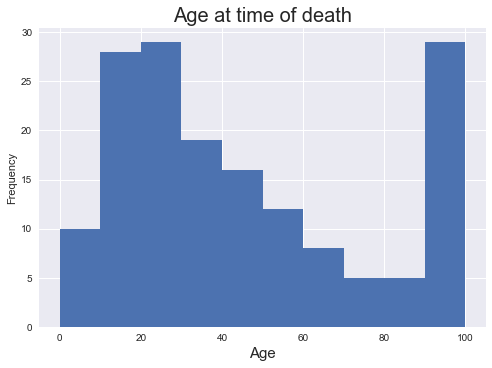

In [13]:
plt.title('Age at time of death',fontsize = 20)
plt.xlabel('Age', fontsize = 15)
sns.despine()
df_visual[df_visual['isAlive']==0][abs(df_visual[df_visual['isAlive']==0]['age'])<150]['age'].plot.hist(bins=10)